# CSCI E-25 - Computer Vision

## Final Project: Cervical Cancer Cell Classification Using Deep Learning Techniques

###  Daniel Ardila

### Introduction

Cervical cancer is a leading cause of cancer-related deaths among women worldwide. Early detection and diagnosis of abnormal cervical cells can greatly improve the chances of successful treatment and survival. Deep learning methods for cervical cancer cell classification can help to improve the accuracy and efficiency of screening tests. In recent years, deep learning techniques have shown promising results in various medical imaging applications, including cancer diagnosis. In this project, we aim to develop a deep learning-based approach for classifying cervical cancer cells as normal or abnormal.


The current way to cervical cancer is through a visual inspection of a biopsy sample. However, this process can be challenging and time-consuming for the specialist, as it requires careful examination to find subtle changes in the cellular architecture. In addition, another problem that can be encountered is an inter-observer variability bias, which means that a diagnosis may be different from one pathologist to another. And it is also time-consuming since there are several features of cells to look out for to determine if dysplasia is present such as cell size, nuclear size, cell arrangement, mitotic activity, and nuclear staining. To help mitigate the previously mentioned problems a deep learning system to help classify between normal/abnormal is proposed for this project. 


We will create three different neural network architectures (an usual CNN architecture, ResNet50, and VGG16) to find the one that is best suited for our classification problem. Additionally, we will be using both augmented data and non-augmented data for each model to see how data augmentation may improve the performance.


#### Objective:
The main objective of this project is to develop a deep learning-based approach for the classification of cervical cancer cells using digital images of cervical cells. The specific objectives of this project are:

- To collect and preprocess a dataset of digital images of cervical cells for training and testing the deep learning model.
- To develop three deep learning-based classification models using convolutional neural networks (CNNs) architectures.
- To compare the performance of the developed model with other state-of-the-art methods for cervical cancer cell classification.


### Why these models?

The ResNet50 and VGG16 models are widely used CNN architectures that have shown strong performance in many computer vision tasks, including medical image classification. These models have a large number of layers and are able to learn complex features from the input images, which makes them well-suited for this type of classification task.

The simple CNN model, on the other hand, is a lightweight model with fewer layers, making it less computationally expensive and faster to train. And it is also a good starting and comparison point.

### Dataset description

For this project, three datasets were be used [1]:
1. The Herlev Pap Smear dataset [3]: This dataset contains 917 single cells
images distributed among 7 different cell type which can be classified into
two larger sets (normal and abnormal).
2. The Mendeley Liquid Based Cytology dataset [2]: This dataset consists
of 963 whole slide images of cervical cytology. The images are distributed
among 4 different classes which can then be classified into a larger sets
(normal and abnormal).
3. SIPaKMeD Pap Smear dataset [4]: It consists of 4049 images of isolated
cells that are distributed into five different classes, which can then be
classified into two larger sets (normal and abnormal).


Let's see how these images are distributed in the different datasets and categories

<img src="./images/distributionImagesDatasets.png" alt="Folder Structure" />


## Dataset download and Folder structure diagram

Each of the datasets can be dowloaded refering to each paper. In overall, they occupy around 5GB of space. Once, these files are downloaded were reorganized in the following structure:



<img src="./images/folderStructure.png" alt="Folder Structure" />

Notice something important: we have a category "Benign" that is not shown in the folder structure diagram. This is because we are not using these images to classify between normal and abnormal cells. Benign cells are a different type of cell that refers specifically to cells that are not cancerous or malignant, and therefore do not invade nearby tissues or produce metastasis. For this reason, we are not considering this type of cell.

This structure is keeped during the whole project.


In [361]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from keras.applications import resnet
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import skimage.io as skio
import matplotlib.pyplot as plt
from keras import models, layers, regularizers, optimizers
#
from skimage import io, transform, exposure
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
#from imutils import paths
import numpy as np
import pandas as pd

import pickle
import os,argparse

## Data Exploration and Preprocessing

In this section, we will explore the distribution of sizes of the dataset. Specifically, we will examine the sizes of the images in the dataset to gain an understanding of the range of sizes present.

In addition to exploring the sizes, we will preprocess the images to look out for way to increase their quality or reduce noise. The following techniques are explored: image normalization, contrast adjustment, edge detection. We will also consider data augmentation techniques, such as rotation, flipping, or zooming, to generate additional training data and increase the robustness of our model.

In [3]:
abnormal = ".\data\Abnormal"
normal = ".\data\\Normal"

In [194]:
# This code reads image files from a directory of abnormal/normal images and appends them to a list, 
# while keeping track of their file paths. It iterates through each folder, 
# and reads the image files with extensions ".bmp" or ".jpg" (excluding files ending with "d.bmp" which are preprocessed images).

matrix_abnormal = []
img_files_abnormal = []
for folder in os.listdir(abnormal):
    print(folder)
    temp_dir = os.path.join(abnormal,folder)
    files = os.listdir(temp_dir)
    if "CROPPED" not in files:
        img_files = [os.path.join(temp_dir, filename) for filename in os.listdir(temp_dir) 
                     if ((filename.lower().endswith(".bmp") or  filename.lower().endswith(".jpg"))and (not filename.lower().endswith("d.bmp")))] 
        print(len(img_files))
        for file_path in img_files:
            img = skio.imread(file_path)
            matrix_abnormal.append(img)
    else:
        new_dir = os.path.join(temp_dir, "CROPPED")
        img_files = [os.path.join(new_dir, filename) for filename in os.listdir(new_dir) 
                     if ((filename.lower().endswith(".bmp") or  filename.lower().endswith(".jpg"))and (not filename.lower().endswith("d.bmp")))]   
        print(len(img_files))

        for file_path in img_files:
            img = skio.imread(file_path)
            matrix_abnormal.append(img)
    img_files_abnormal += img_files

carcinoma_in_situ
150
High_squamous_intra_epithelial_lesion
163
im_Dyskeratotic
813
im_Koilocytotic
825
light_dysplastic
182
Low squamous intra-epithelial lesion
113
moderate_dysplastic
146
severe_dysplastic
197
Squamous_cell_carcinoma
74


In [193]:
# This code reads image files from a directory of abnormal/normal images and appends them to a list, 
# while keeping track of their file paths. It iterates through each folder, 
# and reads the image files with extensions ".bmp" or ".jpg" (excluding files ending with "d.bmp" that are preprocessed images).

matrix_normal = []
img_files_normal = []
for folder in os.listdir(normal):
    print(folder)
    temp_dir = os.path.join(normal, folder)
    files = os.listdir(temp_dir)
    #print(files)
    if "CROPPED" not in files:
        img_files = [os.path.join(temp_dir, filename) for filename in os.listdir(temp_dir) 
                     if ((filename.lower().endswith(".bmp") or  filename.lower().endswith(".jpg"))and (not filename.lower().endswith("d.bmp")))] 
        print(len(img_files))
        for file_path in img_files:
            img = skio.imread(file_path)
            matrix_normal.append(img)
    else:
        new_dir =   os.path.join(temp_dir, "CROPPED")
        img_files = [os.path.join(new_dir, filename) for filename in os.listdir(new_dir) 
                     if ((filename.lower().endswith(".bmp") or  filename.lower().endswith(".jpg"))and (not filename.lower().endswith("d.bmp")))]   
        print(len(img_files))

        for file_path in img_files:
            img = skio.imread(file_path)
            matrix_normal.append(img)
    img_files_normal += img_files

im_Parabasal
787
im_Superficial_Intermediate
831
Negative_for_Intraepithelial_malignancy
612
normal_columnar
98
normal_intermediate
70
normal_superficiel
74


> ### Distribution of image dimension

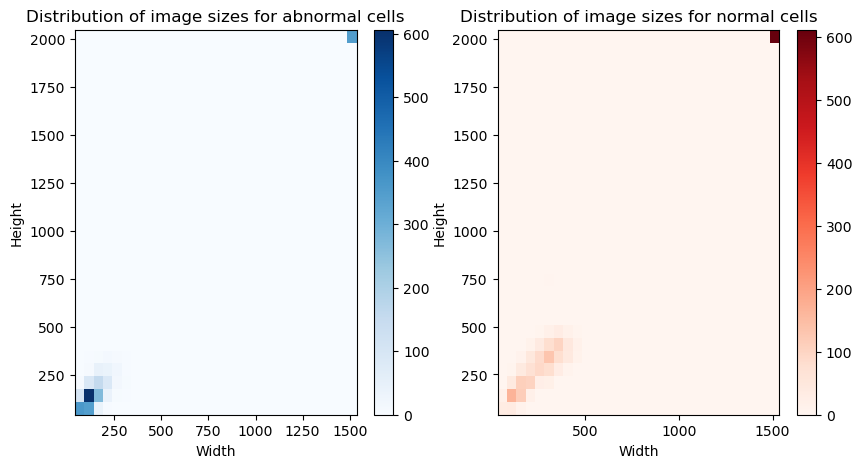

In [441]:
# Save size of images 
width_abnormal = [img.shape[0] for img in matrix_abnormal]
height_abnormal = [img.shape[1] for img in matrix_abnormal]
width_normal = [img.shape[0] for img in matrix_normal]
height_normal = [img.shape[1] for img in matrix_normal]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot for abnormal cells
hb1 = ax1.hist2d(width_abnormal, height_abnormal, bins=30, cmap='Blues')
ax1.set_xlabel("Width")
ax1.set_ylabel("Height")
ax1.set_title("Distribution of image sizes for abnormal cells")
fig.colorbar(hb1[3], ax=ax1)

# Plot for normal cells
hb2 = ax2.hist2d(width_normal, height_normal, bins=30, cmap='Reds')
ax2.set_xlabel("Width")
ax2.set_ylabel("Height")
ax2.set_title("Distribution of image sizes for normal cells")
fig.colorbar(hb2[3], ax=ax2)

plt.show()

Notice that most of the abnormal cell images have dimensions less than $250\times250$, but there are a few hundred with dimensions near $1500\times2000$.

For normal cells, there is a more uniform distribution of image sizes with dimensions lower than $500\times500$, but there is a region where there are more than 500 images with dimensions near $1500\times2000$.

These high-density regions with large values in dimensions correspond to the images that were not cropped.

> ### Distribution of cell type

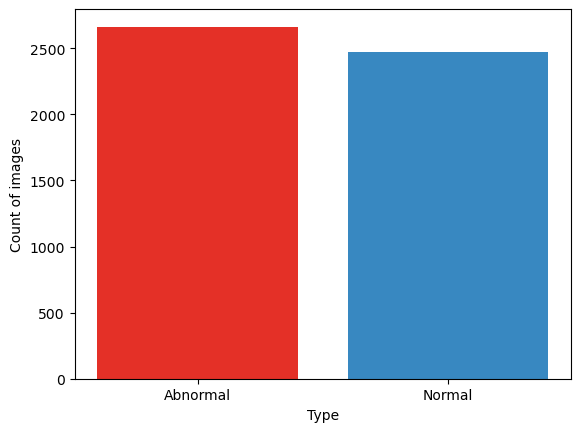

In [442]:
plt.bar(["Abnormal","Normal"], [len(matrix_abnormal),len(matrix_normal)],color=["#E43027", "#3888C1"])
plt.ylabel("Count of images")
plt.xlabel("Type")
plt.show()

Notice that we have a balanced dataset and we do not have to apply any techniques to overcome class imbalance. 

Class imbalance is a common problem in classification problems where one class has significantly more or fewer instances than the other class. In such cases, the model may become biased towards the majority class and perform poorly on the minority class. However, in this case, we do not have to worry about class imbalance since we have a balanced dataset and our model will not be biased towards any particular class.


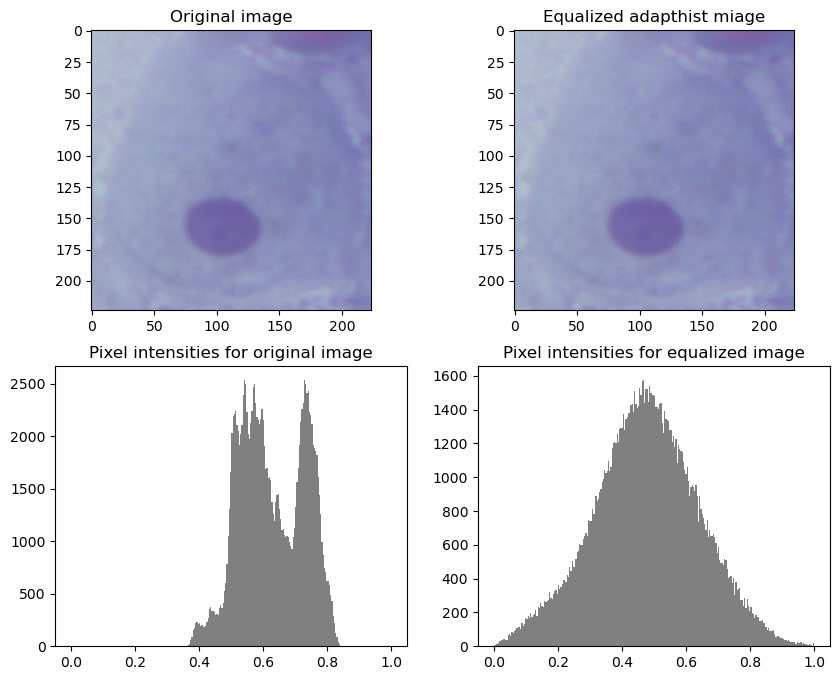

In [444]:
img_resized = transform.resize(matrix_normal[0], (224,224), anti_aliasing=True)
img_normalized = exposure.rescale_intensity(img_resized, in_range=(0, 1))
img_equalized = exposure.equalize_adapthist(img_normalized)

def plot_gray_intensity(image1, image2):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
    ax = ax.flatten()
    ax[0].imshow(img_resized)
    ax[0].set_title('Original image')

    ax[1].imshow(img_normalized)
    ax[1].set_title('Equalized adapthist miage')

    
    ax[2].hist(image1.ravel(), bins=256, range=[0, 1], color='gray')
    ax[2].set_title('Pixel intensities for original image')
    
    ax[3].hist(image2.ravel(), bins=256, range=[0, 1], color='gray')
    ax[3].set_title('Pixel intensities for equalized image')

    plt.show()
    
plot_gray_intensity(img_resized, img_equalized)

Notice that adaptive histogram equalization can cause over-enhancement or amplification of noise in the image, resulting in the appearance of artifacts or image regions with no relevance becoming more apparent.

## Data preparation

To begin, we will start by preparing the dataset. This will involve dividing the data into training, and validation sets. We will then create two images generators: one with augmented data and one without. The augmented generator include techniques such as random rotation, flipping, and zooming to increase the diversity of the training data.



In [199]:
# This code creates two lists of labels for normal and abnormal image files
# then it creates dataframes for each type of image with file names and corresponding labels, 
# concatenates the dataframes, and assigns the result to df_img_files.

label_normal = ["normal"]*len(img_files_normal)
label_abnormal = ['abnormal']*len(img_files_abnormal)

df_img_normal_files = pd.DataFrame(list(zip(img_files_normal, label_normal)),columns = ["file_name","label"] )
df_img_abnormal_files = pd.DataFrame(list(zip(img_files_abnormal, label_abnormal)),columns = ["file_name","label"] )
df_img_files = pd.concat([df_img_normal_files, df_img_abnormal_files]).reset_index(drop = True)

In [210]:
# Split the dataset into training and testing sets
X = df_img_files[['file_name']]
y = df_img_files[['label']]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

# Combine the file names and labels to create separate training and testing dataframes
df_train = pd.concat([X_train,y_train], axis = 1)
df_test = pd.concat([X_test,y_test], axis = 1)

# Print the shape of the training and testing dataframes
print(df_train.shape, df_test.shape)

(4108, 2) (1027, 2)


> ### Image generator with no augmentation

Some architetures are designed or build to support certain input dimension, for this reason it is important to standarize the size of the image and the pixel intensities. For our three models we will resized the images to 224x224.

In [432]:
# Create an instance of ImageDataGenerator without any data augmentation
image_gen_no_augm = ImageDataGenerator()

# Create a generator for the training data using the flow_from_dataframe method
train_no_augmen = image_gen_no_augm.flow_from_dataframe(
                                dataframe = df_train,
                                directory = None,
                                x_col = "file_name",
                                y_col = "label",
                                batch_size = 32,
                                seed = 42,
                                class_mode='categorical',
                                target_size = (224,224))

# Create a generator for the testing data using the flow_from_dataframe method

test_no_augmen  = image_gen_no_augm.flow_from_dataframe(
                                dataframe = df_test,
                                directory = None,
                                x_col = "file_name",
                                y_col = "label",
                                batch_size = 32,
                                seed = 42,
                                class_mode='categorical',
                                target_size = (224,224))

Found 4108 validated image filenames belonging to 2 classes.
Found 1027 validated image filenames belonging to 2 classes.


> ### Image generator with augmentation

In [427]:
# Define data augmentation parameters for training data 
train_augmen_datagen = ImageDataGenerator( zoom_range=0.3, rotation_range=50,
                 width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                 horizontal_flip=True, fill_mode='nearest')

# Define data augmentation parameters for testing data
test_augmen_datagen = ImageDataGenerator()

# Generate augmented training data from dataframe
train_augmen = train_augmen_datagen.flow_from_dataframe(
                                dataframe = df_train,
                                directory = None,
                                x_col = "file_name",
                                y_col = "label",
                                batch_size = 32,
                                seed = 42,
                                target_size = (224,224))

# Generate augmented testing data from dataframe
test_augmen = test_augmen_datagen.flow_from_dataframe(
                                dataframe = df_test,
                                directory = None,
                                x_col = "file_name",
                                y_col = "label",
                                batch_size = 32,
                                seed = 42,
                                target_size = (224,224))

Found 4108 validated image filenames belonging to 2 classes.
Found 1027 validated image filenames belonging to 2 classes.


> ### Samples of normal and abnormal images with transformations 

Found 1 validated image filenames belonging to 1 classes.
Labels: ['normal', 'normal', 'normal', 'normal', 'normal']


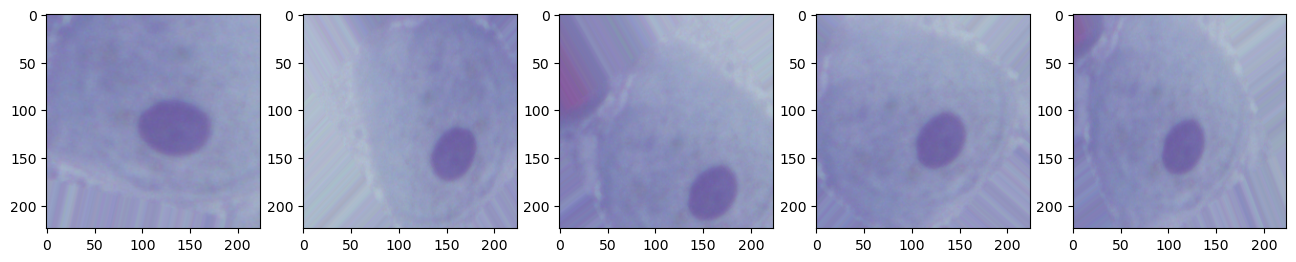

In [365]:
# Select a single normal image from the dataset
sample_normal = df_img_files.iloc[:1]

# Generate a batch of transformed images for the selected normal image
normal_generator = train_augmen_datagen.flow_from_dataframe(
                                dataframe=sample_normal,
                                directory=None,
                                x_col="file_name",
                                y_col="label",
                                batch_size=1,
                                seed=42,
                                target_size=(224,224))

normal_transformations = [next(normal_generator) for i in range(0,5)] 

# Plot the transformed images
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print("Labels:", [sample_normal['label'].iloc[0] for i in range(0,5)]) 
l = [ax[i].imshow(normal_transformations[i][0][0]) for i in range(0,5)]

Found 1 validated image filenames belonging to 1 classes.
Labels: ['abnormal', 'abnormal', 'abnormal', 'abnormal', 'abnormal']


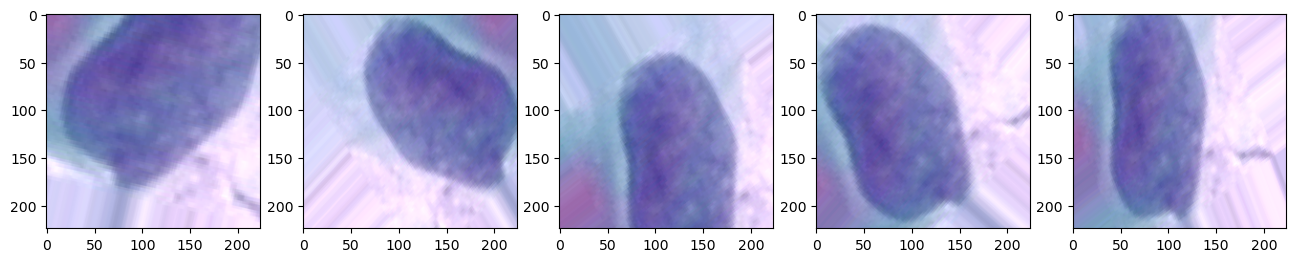

In [366]:
# Select a single abnormal image from the dataset
sample_abnormal = df_img_files.iloc[len(df_img_files)-100:len(df_img_files)-99]

# Generate a batch of transformed images for the selected normal image
abnormal_generator =  train_augmen_datagen.flow_from_dataframe(
                                dataframe=sample_abnormal,
                                directory=None,
                                x_col="file_name",
                                y_col="label",
                                batch_size=1,
                                seed=42,
                                target_size=(224,224))


abnormal_transformations = [next(abnormal_generator) for i in range(0,5)] 


# Plot the transformed images
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print("Labels:", [sample_abnormal['label'].iloc[0] for i in range(0,5)]) 
l = [ax[i].imshow(abnormal_transformations[i][0][0]) for i in range(0,5)]

## Models

In this section, we are creating three different neural network architectures (an usual CNN architecture, ResNet50, and VGG16) to find the one that is best suited for our classification problem. Additionally, we will be using both augmented data and non-augmented data for each model to see how data augmentation may improve the performance.

By comparing the results, we will be able to determine which architecture is best suited for our classification problem and whether data augmentation improves the performance of the models. 

In this section we implement the three types of models using augmented data and non-augmented data.

- CNN model
- ResNet50
- VGG16



## Simple CNN Model

The following architecture it's a CNN model used in class consists of multiple convolutional and max-polling layers. Also,  LeakyReLU activation is used to avoid the vanishing gradient problem and the Batch Normalization is used to normalized the inputs. Notice that the layers were adequated for our classification task. This model is a simple CNN compared to others, but it has enough depth to learn the necessary features. 

In [234]:
nn = models.Sequential()
# 3X3 convolutional layer with 32 output channels using the Conv2D function, with activation='relu'
nn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
nn.add(layers.LeakyReLU(alpha=0.2))
# A 3X3 max pooling layer using the MaxPooling2D function.
nn.add(layers.MaxPooling2D((2, 2)))
nn.add(layers.BatchNormalization(momentum=0.8))
# A final 3X3 convolution layer with 64 output channels, with activation='relu'.
nn.add(layers.Conv2D(16, (3, 3), activation='relu'))
# Another 2X2 max pooling layer.
nn.add(layers.MaxPooling2D((2, 2)))
# A final 3X3 convolution layer with 16 output channels, with activation='relu'.
nn.add(layers.Conv2D(8, (3, 3), activation='relu'))
nn.add(layers.MaxPooling2D((2, 2)))
nn.add(layers.Dropout(rate=0.10))
# The 64 channel feature map is flattened to a vector.
nn.add(layers.Flatten())
nn.add(layers.LeakyReLU(alpha=0.1))
# A Dense (fully-connected) hidden layer with 64 units is the first classifier layer, with activation='relu' , and L1 regularization
nn.add(layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.L2(l2=0.001)))
# A dropout layer is used to improve regularization of the model using the Dropout function with argument 0.5.
nn.add(layers.Dropout(rate=0.15))
nn.add(layers.Dense(units=4096, activation='relu'))
nn.add(layers.Dense(units=2048, activation='relu'))
# The output Dense layer has 2 units with activation='softmax' to indicate the classification of the two classes.
nn.add(layers.Dense(units=2, activation='softmax'))
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 16)      

In [237]:
nn.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy',
 metrics = ['accuracy'])

callbacks_list = [EarlyStopping( monitor = 'val_accuracy', # Use accuracy to monitor the model
                                                 patience = 6)] # Stop after one step with lower accuracy


## CNN No augmentation

In [245]:
simple_model_nn = nn.fit(train_generator, epochs=20, validation_data = test_generator, callbacks = callbacks_list)

Epoch 1/20
109/109 [==============================] - 120s 1s/step - loss: 0.2846 - accuracy: 0.9006 - val_loss: 0.3892 - val_accuracy: 0.8421
Epoch 2/20
109/109 [==============================] - 121s 1s/step - loss: 0.2782 - accuracy: 0.9139 - val_loss: 0.2961 - val_accuracy: 0.8924
Epoch 3/20
109/109 [==============================] - 120s 1s/step - loss: 0.2580 - accuracy: 0.9191 - val_loss: 0.5036 - val_accuracy: 0.8300
Epoch 4/20
109/109 [==============================] - 124s 1s/step - loss: 0.2725 - accuracy: 0.9151 - val_loss: 0.5591 - val_accuracy: 0.7515
Epoch 5/20
109/109 [==============================] - 121s 1s/step - loss: 0.2465 - accuracy: 0.9214 - val_loss: 0.4153 - val_accuracy: 0.8239
Epoch 6/20
109/109 [==============================] - 120s 1s/step - loss: 0.2359 - accuracy: 0.9240 - val_loss: 0.4209 - val_accuracy: 0.8501
Epoch 7/20
109/109 [==============================] - 120s 1s/step - loss: 0.2524 - accuracy: 0.9284 - val_loss: 0.3469 - val_accuracy: 0.8944

In [241]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color='red', label='Test loss')
    plt.plot(x, train_loss, color='blue', label='Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    plt.show()
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch') 

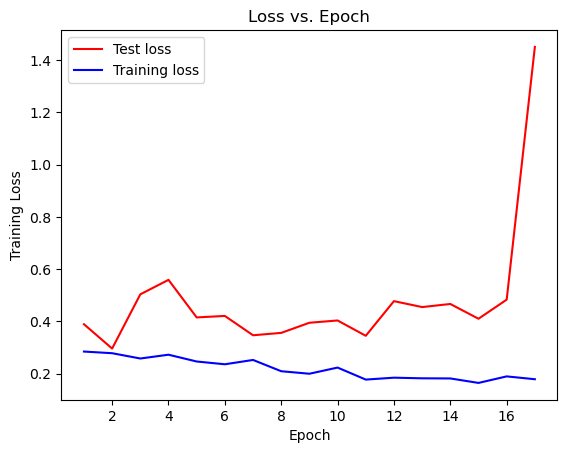

In [433]:
#simple_overfitting_model
plot_loss(simple_overfitting_model)

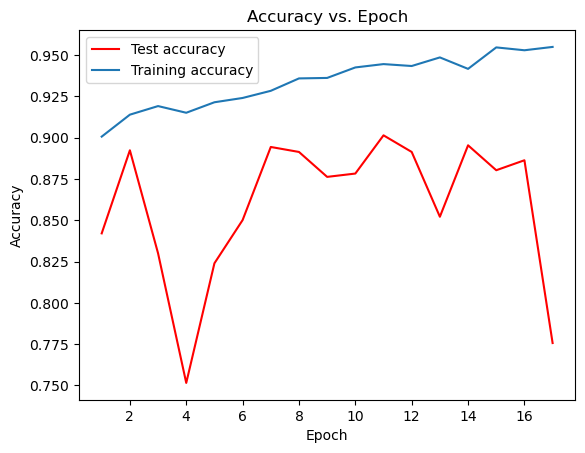

In [246]:
#simple_overfitting_model
plot_accuracy(simple_model_nn)

### Comments about the model: 

The model achieved a  training accuracy of 95.49% and validation accuracy of 0.886%  However,the oscillation suggests that the model might be overfitting to the training data.

Notice that starting at epoch 11, the validation loss starts to rise, indicating that the model is beginning to overfit the training data. In order to reduce overfitting, the model must be tuned via regularization techniques or by adjusting the number of epochs. 

## CNN model with augmented data

In [373]:
simple_model_nn_augmen = nn.fit(train_augmen, epochs=20, validation_data = test_augmen, callbacks = callbacks_list)

Epoch 1/20
129/129 [==============================] - 192s 1s/step - loss: 0.4228 - accuracy: 0.8452 - val_loss: 0.3512 - val_accuracy: 0.8754
Epoch 2/20
129/129 [==============================] - 169s 1s/step - loss: 0.3735 - accuracy: 0.8612 - val_loss: 0.3047 - val_accuracy: 0.8832
Epoch 3/20
129/129 [==============================] - 169s 1s/step - loss: 0.3544 - accuracy: 0.8703 - val_loss: 0.2843 - val_accuracy: 0.9143
Epoch 4/20
129/129 [==============================] - 171s 1s/step - loss: 0.3341 - accuracy: 0.8783 - val_loss: 0.2494 - val_accuracy: 0.9124
Epoch 5/20
129/129 [==============================] - 167s 1s/step - loss: 0.3412 - accuracy: 0.8836 - val_loss: 0.4091 - val_accuracy: 0.8247
Epoch 6/20
129/129 [==============================] - 168s 1s/step - loss: 0.3350 - accuracy: 0.8836 - val_loss: 0.3956 - val_accuracy: 0.8793
Epoch 7/20
129/129 [==============================] - 172s 1s/step - loss: 0.3143 - accuracy: 0.8888 - val_loss: 0.2935 - val_accuracy: 0.9056

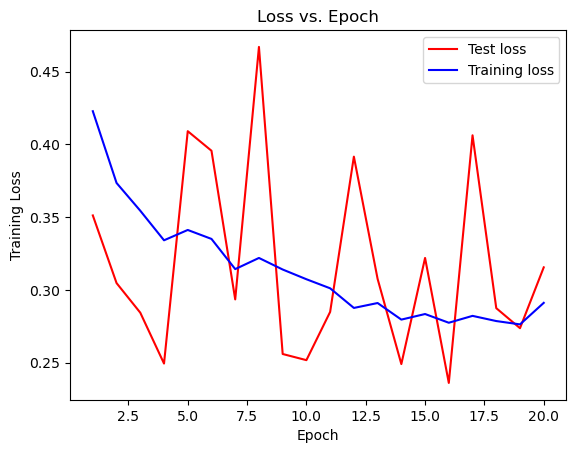

In [434]:
plot_loss(simple_model_nn_augmen)

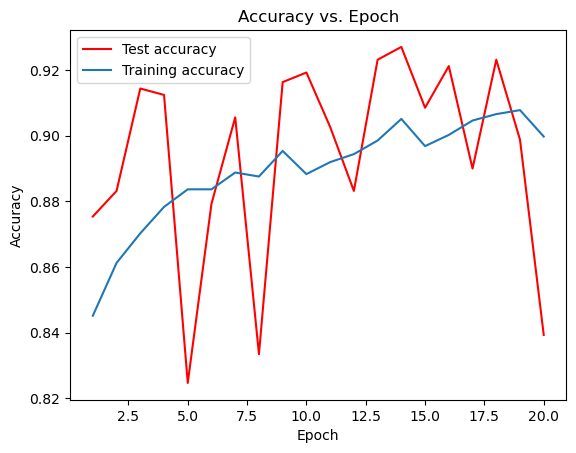

In [374]:
plot_accuracy(simple_model_nn_augmen)

### Comments about the model

Notice that the model achieved a training accuracy of 89.97% and a validation accuracy of 83.93%. The training loss was 0.2911 and the validation loss was 0.3155.

The oscillation on the test accuracy and the test loss may be a cause of overfitting. 

### Comparing the two models with augmented and non-augmented data

Comparing both reports, it appears that the second model with non-augmented data performed better overall, as it started with a higher accuracy rate in the first epoch and consistently showed better validation accuracy across the epochs. The first model showed more variability in the validation accuracy rate, with the highest and lowest validation accuracy rates being more extreme than the second model.They both show oscillations for the test set. 

## ResNet50 non-augmented data

In [352]:
from keras.applications.resnet import ResNet50

from keras.models import Model
import keras
IMG_HEIGHT = 224
IMG_WIDTH = 224
input_shape = (IMG_HEIGHT,IMG_WIDTH,3)


# create an instance of the ResNet50 model pre-trained,with the top layers (including the final output layer) excluded
m_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)


#flatten the output tensor, ready for passing to a fully connected layer.
output = m_resnet.layers[-1].output
output = keras.layers.Flatten()(output)
m_resnet = Model(m_resnet.input , output)

#freeze the weights of all layers in the new model so that they are not trainable.
for layer in m_resnet.layers:
    layer.trainable = False
m_resnet.summary()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [353]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
import tensorflow as tf
modelResnet = models.Sequential()
modelResnet.add(m_resnet)
modelResnet.add(Dense(512, activation='relu', input_dim=input_shape))
modelResnet.add(Dropout(0.3))
modelResnet.add(Dense(512, activation='relu'))
modelResnet.add(Dropout(0.3))
modelResnet.add(Dense(2, activation='softmax'))
modelResnet.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])
modelResnet.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_8 (Functional)        (None, 100352)            23587712  
                                                                 
 dense_52 (Dense)            (None, 512)               51380736  
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_53 (Dense)            (None, 512)               262656    
                                                                 
 dropout_34 (Dropout)        (None, 512)               0         
                                                                 
 dense_54 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 75,232,130
Trainable params: 51,644,418

In [354]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [355]:
history_resnet = modelResnet.fit(train_generator, 
                              epochs=100,
                              validation_data=test_generator,
                             callbacks=[early_stop])

Epoch 1/100
109/109 [==============================] - 420s 3s/step - loss: 0.2874 - accuracy: 0.9099 - val_loss: 0.1182 - val_accuracy: 0.9658
Epoch 2/100
109/109 [==============================] - 368s 3s/step - loss: 0.1107 - accuracy: 0.9633 - val_loss: 0.1068 - val_accuracy: 0.9668
Epoch 3/100
109/109 [==============================] - 379s 3s/step - loss: 0.0613 - accuracy: 0.9824 - val_loss: 0.0913 - val_accuracy: 0.9718
Epoch 4/100
109/109 [==============================] - 376s 3s/step - loss: 0.0314 - accuracy: 0.9913 - val_loss: 0.0960 - val_accuracy: 0.9668
Epoch 5/100
109/109 [==============================] - 375s 3s/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.1055 - val_accuracy: 0.9718
Epoch 6/100
109/109 [==============================] - 375s 3s/step - loss: 0.0108 - accuracy: 0.9986 - val_loss: 0.1133 - val_accuracy: 0.9698
Epoch 7/100
109/109 [==============================] - 373s 3s/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.1400 - val_accuracy:

In [357]:
modelResnet.save_weights('tlearn_img_normal_cnn_restnet50_weights.h5')
modelResnet.save('tlearn_img_normal_cnn_restnet50.h5')
# modelResnet.load_weights('tlearn_img_normal_cnn_restnet50_weights.h5')


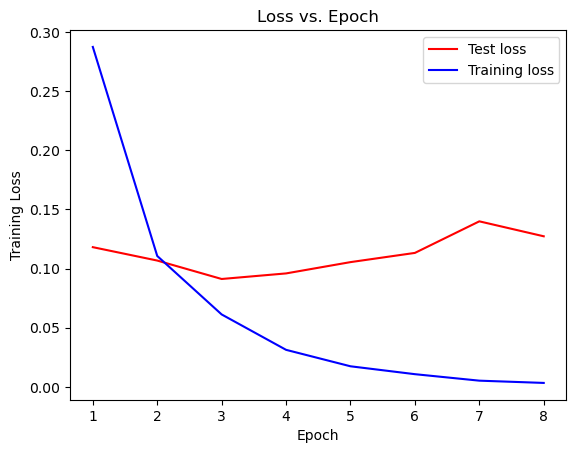

In [436]:
plot_loss(history_resnet)

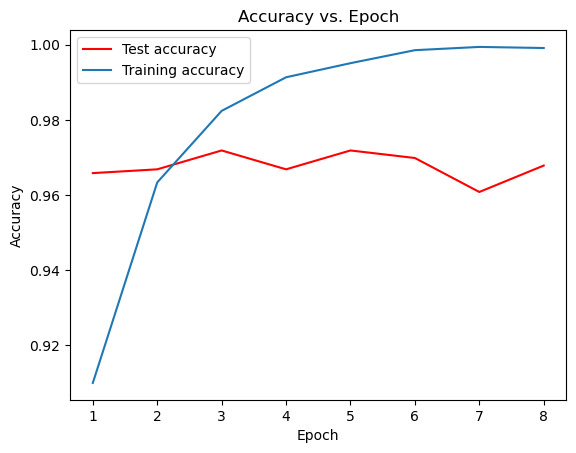

In [435]:
plot_accuracy(history_resnet)

### Comments about the model

Notice the model has achieved high accuracy and low loss on both the training and validation sets. The training accuracy and validation accuracy are both above 95%, and the validation loss is decreasing over time, which indicates that the model is learning to generalize well to new data. 

## ResNet50 augmented data

In [445]:
history_resnet_augmen = modelResnet.fit(train_augmen, 
                              epochs=50,
                              validation_data = test_augmen,
                             callbacks=[early_stop])

Epoch 1/50
129/129 [==============================] - 453s 4s/step - loss: 0.2644 - accuracy: 0.9326 - val_loss: 0.0833 - val_accuracy: 0.9786
Epoch 2/50
129/129 [==============================] - 453s 4s/step - loss: 0.1706 - accuracy: 0.9460 - val_loss: 0.0737 - val_accuracy: 0.9727
Epoch 3/50
129/129 [==============================] - 452s 4s/step - loss: 0.1452 - accuracy: 0.9523 - val_loss: 0.0791 - val_accuracy: 0.9727
Epoch 4/50
129/129 [==============================] - 454s 4s/step - loss: 0.1351 - accuracy: 0.9569 - val_loss: 0.0900 - val_accuracy: 0.9747
Epoch 5/50
129/129 [==============================] - 453s 4s/step - loss: 0.1235 - accuracy: 0.9611 - val_loss: 0.0747 - val_accuracy: 0.9688
Epoch 6/50
129/129 [==============================] - 454s 4s/step - loss: 0.1113 - accuracy: 0.9608 - val_loss: 0.0832 - val_accuracy: 0.9766


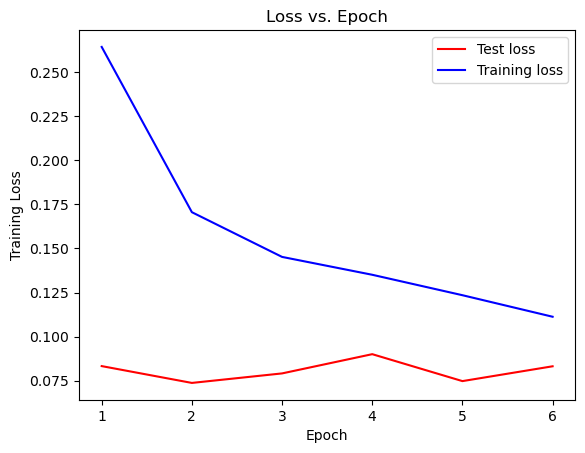

In [451]:
plot_loss(history_resnet_augmen)

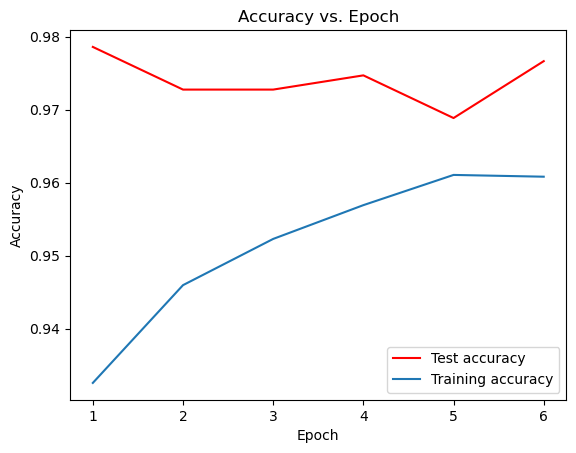

In [452]:
plot_accuracy(history_resnet_augmen)

### Comments about the model 

This model seems to perform well, with consistently high accuracy (over 96%) and relatively low loss values across the epochs. Notice also that the validation accuracy is also consistently high, indicating that the model is not overfitting to the training data.

### Comparing the two models with augmented and non-augmented data

It is clear that the two models behave well. However, the second model with augmented data behaves slightly better and overcome the small problem of overfitting of the first model.

## VGG16 with augmented data

In [376]:
from keras.applications.vgg16 import VGG16


In [428]:
base_model_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape= input_shape)
base_model_VGG16.trainable = False

base_model_VGG16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [429]:
#Now we add the last layers for our specific problem.

modelVGG16 = models.Sequential()
modelVGG16.add(base_model_VGG16)
modelVGG16.add(Flatten())

modelVGG16.add(Dense(4096, activation='relu'))
modelVGG16.add(Dense(1072, activation='relu'))
modelVGG16.add(Dropout(0.2))
modelVGG16.add(Dense(2, activation='softmax'))
modelVGG16.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_29 (Flatten)        (None, 25088)             0         
                                                                 
 dense_105 (Dense)           (None, 4096)              102764544 
                                                                 
 dense_106 (Dense)           (None, 1072)              4391984   
                                                                 
 dropout_55 (Dropout)        (None, 1072)              0         
                                                                 
 dense_107 (Dense)           (None, 2)                 2146      
                                                                 
Total params: 121,873,362
Trainable params: 107,158,6

In [430]:
modelVGG16.compile(
   optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', patience=2,  restore_best_weights=True)

In [431]:
hist_modelVGG16_augmen = modelVGG16.fit(train_augmen, epochs=50, validation_data= test_augmen , batch_size=32, callbacks=[es])

Epoch 1/50
129/129 [==============================] - 1177s 9s/step - loss: 2.7105 - accuracy: 0.8031 - val_loss: 0.5150 - val_accuracy: 0.8598
Epoch 2/50
129/129 [==============================] - 1161s 9s/step - loss: 0.4926 - accuracy: 0.8761 - val_loss: 0.3773 - val_accuracy: 0.9318
Epoch 3/50
129/129 [==============================] - 1214s 9s/step - loss: 0.4168 - accuracy: 0.8975 - val_loss: 0.2296 - val_accuracy: 0.9513
Epoch 4/50
129/129 [==============================] - 1160s 9s/step - loss: 0.3722 - accuracy: 0.9099 - val_loss: 0.1760 - val_accuracy: 0.9552
Epoch 5/50
129/129 [==============================] - 1161s 9s/step - loss: 0.3346 - accuracy: 0.9107 - val_loss: 0.1914 - val_accuracy: 0.9474
Epoch 6/50
129/129 [==============================] - 1142s 9s/step - loss: 0.2885 - accuracy: 0.9187 - val_loss: 0.2345 - val_accuracy: 0.9601
Epoch 7/50
129/129 [==============================] - 1159s 9s/step - loss: 0.2793 - accuracy: 0.9323 - val_loss: 0.2873 - val_accuracy:

In [437]:
modelVGG16.save('learn_cervicalCancer_img_VGG16.h5')

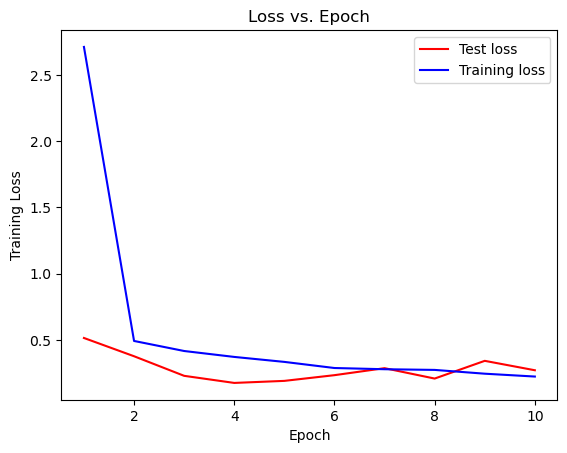

In [440]:
plot_loss(hist_modelVGG16_augmen)

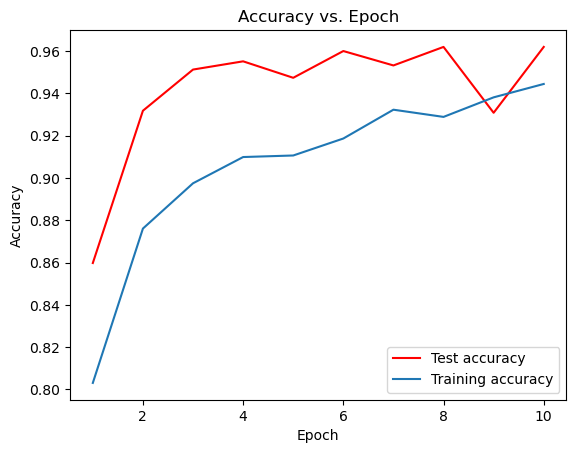

In [439]:
plot_accuracy(hist_modelVGG16_augmen)

### Comments about the model

This model seems to perform quite well, with an accuracy of around 94% on the training set and 96% on the validation set after 10 epochs. The loss is also decreasing with each epoch, which suggests that the model is learning effectively.

## VGG16 with non-augmented data

In [454]:
base_model_VGG16 = VGG16(weights="imagenet", include_top=False, input_shape= input_shape)
base_model_VGG16.trainable = False

base_model_VGG16.summary()
modelVGG16 = models.Sequential()
modelVGG16.add(base_model_VGG16)
modelVGG16.add(Flatten())

modelVGG16.add(Dense(4096, activation='relu'))
modelVGG16.add(Dense(1072, activation='relu'))
modelVGG16.add(Dropout(0.2))
modelVGG16.add(Dense(2, activation='softmax'))
modelVGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [455]:
modelVGG16.compile(
   optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', patience=2)

In [ ]:
hist_modelVGG16_non_augmen = modelVGG16.fit(train_no_augmen, 
                                            epochs=50, validation_data= test_no_augmen , batch_size=32, callbacks=[es])

<img src="./images/performance_VGG16_nonAgumented.png" alt="Folder Structure" />


## Conclusions 

1. ResNet50 and VGG16 outperform the simpler CNN: The ResNet50 and VGG16 models are deeper and more complex than the simple CNN, and they perform better on the classification task as expected. These two deeper models overcome the problem of overfitting.

2. ResNet50 and VGG16 have similar performance: The ResNet50 and VGG16 models perform similarly on the classification task, with no significant difference in accuracy or other evaluation metrics. This indicates that both models are suitable for the task and can achieve similar performance.

3. Notice how model performance was enhanced through augmentation: Using data augmentation we are able to produce a bigger and more varied training dataset, which enhance the generalizability of the models. As a result, the models that were trained using the augmented data outperform those that were trained using the non-augmented data.


## Further work 

The current models architecture used for cervical cancer classification show promising results. However, there are other state-of-the-art architectures, such as EfficientNet, that could be explored to improve the accuracy of the model. It is known that EfficientNet has outperform many other architectures on various image classification tasks.

In addition to exploring different architectures, fine-tuning the model could also be a useful technique to improve performance. Fine-tuning involves taking a pre-trained model and adjusting its weights on a new dataset to improve its performance on a specific task. This can be done by unfreezing certain layers of the pre-trained model and training the model on the new dataset with a smaller learning rate.

Additionally, exploring other techniques such as edge enhancement or applying Hough transforms to extract features from the images may improve the accuracy of the classification. Edge enhancement can help to sharpen the edges in an image, making it easier to distinguish between abnormal and normal cells. Hough transforms, on the other hand, can be used to detect circular objects in an image, which could be useful for identifying abnormal cells with irregular shapes. 



## Bibliography 

[1] . Hritam Basak et al. “Cervical Cytology Classification Using PCA and
GWO Enhanced Deep Features Selection”. In: SN Computer Science 2.5
(July 2021). doi: 10.1007/s42979-021-00741- 2. url: https://doi.org/10.1007%2Fs42979-021-00741-2.

[2] Elima Hussain et al. “Liquid based-cytology Pap smear dataset for automated
multi-class diagnosis of pre-cancerous and cervical cancer lesions”.
In: Data in Brief 30 (2020), p. 105589. issn: 2352-3409. doi: https://doi.org/10.1016/j.dib.2020.105589. url: https://www.sciencedirect.com/science/article/pii/S2352340920304832.

[3] Jan Jantzen et al. “Pap-smear Benchmark Data For Pattern Classification”.
English. In: Proc. NiSIS 2005. Nature inspired Smart Information Systems
: EU co-ordination action, Nisis 2005 ; Conference date: 01-01-2005. NiSIS,
2005, pp. 1–9.

[4] Marina Plissiti et al. “Sipakmed: A New Dataset for Feature and Image
Based Classification of Normal and Pathological Cervical Cells in Pap
Smear Images”. In: Oct. 2018, pp. 3144–3148. doi: 10.1109/ICIP.2018.
8451588.